In [ ]:
import tensorflow as tf
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),  
      tf.keras.metrics.AUC(name='auc'),
]

In [ ]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import optimizers
from tensorflow.keras import backend as K
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import PIL
import matplotlib.pyplot as plt
import json
from IPython.display import Image as disp_image 
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data_dir = '/content/drive/My Drive/DR_Messidor_Dataset'
img_height = 256
img_width = 256
batch_size = 32
channels = 3

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2) # set validation split

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='training') # set as training data

validation_generator = train_datagen.flow_from_directory(
    train_data_dir, # same directory as training data
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation') # set as validation data

Found 309 images belonging to 2 classes.
Found 77 images belonging to 2 classes.


In [ ]:
model = tf.keras.applications.VGG19(weights = "imagenet", include_top=False, 
input_shape = (img_width, img_height, channels))

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in model.layers[:-5]:
    layer.trainable = False

top_model = Sequential()
top_model.add(model)
top_model.add(Flatten())
top_model.add(Dense(256, activation='relu'))
top_model.add(Dropout(0.5))
top_model.add(Dense(1, activation='sigmoid'))

print(model.summary())
print(top_model.summary())

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [ ]:
top_model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1e-4, decay=1e-6),
                  metrics=METRICS)

history = top_model.fit(
          train_generator,
          steps_per_epoch=train_generator.n // batch_size,
          epochs=18,
          validation_data=validation_generator,
          validation_steps=validation_generator.n // batch_size)

Epoch 1/18
 52/180 [=======>......................] - ETA: 44:20 - loss: 0.3290 - accuracy: 0.8353 - precision: 0.8579 - recall: 0.8262 - auc: 0.9058

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


180/180 [==============================] - 4679s 26s/step - loss: 0.1712 - accuracy: 0.9253 - precision: 0.9391 - recall: 0.9180 - auc: 0.9735 - val_loss: 0.0584 - val_accuracy: 0.9785 - val_precision: 0.9854 - val_recall: 0.9738 - val_auc: 0.9976
Epoch 2/18
180/180 [==============================] - 165s 914ms/step - loss: 0.0884 - accuracy: 0.9816 - precision: 0.9864 - recall: 0.9787 - auc: 0.9950 - val_loss: 0.0656 - val_accuracy: 0.9764 - val_precision: 0.9740 - val_recall: 0.9816 - val_auc: 0.9964
Epoch 3/18
180/180 [==============================] - 165s 918ms/step - loss: 0.0471 - accuracy: 0.9870 - precision: 0.9891 - recall: 0.9862 - auc: 0.9980 - val_loss: 0.0598 - val_accuracy: 0.9792 - val_precision: 0.9804 - val_recall: 0.9804 - val_auc: 0.9975
Epoch 4/18
180/180 [==============================] - 166s 921ms/step - loss: 0.0444 - accuracy: 0.9877 - precision: 0.9898 - recall: 0.9869 - auc: 0.9976 - val_loss: 0.0341 - val_accuracy: 0.9903 - val_precision: 0.9883 - val_recal

In [ ]:
print('\nEpoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy')
Epochs = 18
for i in range(Epochs):
  print('{:8d} {:10f} \t {:10f} \t {:10f} \t {:10f}'.format(i + 1, history.history['loss'][i], history.history['accuracy'][i], history.history['val_loss'][i], history.history['val_accuracy'][i]))


Epoch No.  Train Loss  Train Accuracy      Val Loss      Val Accuracy
       1   0.171202 	   0.925263 	   0.058366 	   0.978472
       2   0.088438 	   0.981588 	   0.065641 	   0.976389
       3   0.047062 	   0.986972 	   0.059835 	   0.979167
       4   0.044440 	   0.987667 	   0.034132 	   0.990278
       5   0.049259 	   0.990620 	   0.054866 	   0.986111
       6   0.058018 	   0.992705 	   0.118981 	   0.984028
       7   0.085091 	   0.994963 	   0.094704 	   0.987500
       8   0.061856 	   0.990446 	   0.062731 	   0.994444
       9   0.059303 	   0.990968 	   0.071824 	   0.987500
      10   0.046635 	   0.994789 	   0.102524 	   0.992361
      11   0.046609 	   0.992878 	   0.170880 	   0.989583
      12   0.096892 	   0.997047 	   0.402389 	   0.983333
      13   0.028699 	   0.994442 	   0.077903 	   0.993750
      14   0.041170 	   0.995310 	   0.079084 	   0.987500
      15   0.025339 	   0.996005 	   0.135230 	   0.988194
      16   0.046749 	   0.996352 	   0.06286

In [ ]:
score = top_model.evaluate(validation_generator)
f1_score = (2*score[2]*score[3])/(score[2]+score[3])
print("\n","Loss: ", score[0],"\n", "Accuracy: ", score[1],"\n", "Precision: ",score[2], "\n","Recall: ",score[3],"\n","F1-Score: ",f1_score,"\n","AUC: ",score[4])

46/46 [==============================] - 35s 746ms/step - loss: 0.2020 - accuracy: 0.9848 - precision: 0.9818 - recall: 0.9895 - auc: 0.9876

 Loss:  0.20197546482086182 
 Accuracy:  0.9847856163978577 
 Precision:  0.9818417429924011 
 Recall:  0.9895424842834473 
 F1-Score:  0.9856770730852985 
 AUC:  0.9875547885894775


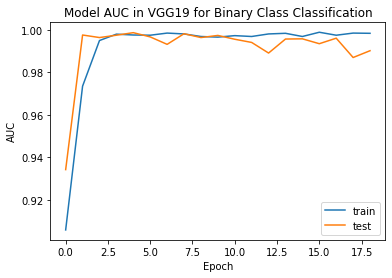

In [ ]:
import matplotlib.pyplot as plt
auc = [0.9058,0.9735, 0.9950,0.9980, 0.9976,0.9975,0.9985,0.9981,0.9969,0.9966,0.9973,0.9969,0.9981,0.9984,0.9969,0.9989,0.9975,0.9985,0.9984]
val_auc = [0.9342,0.9976,0.9964,0.9975,0.9987, 0.9967,0.9932,0.9982,0.9964,0.9974,0.9956,0.9941,0.9891,0.9957,0.9958,0.9935,0.9961,0.9870,0.9902  ]
plt.title('Model AUC in VGG19 for Binary Class Classification')
plt.ylabel('AUC')
plt.xlabel('Epoch')
plt.plot(auc, label='train')
plt.plot(val_auc, label='test')
plt.legend()
plt.show()


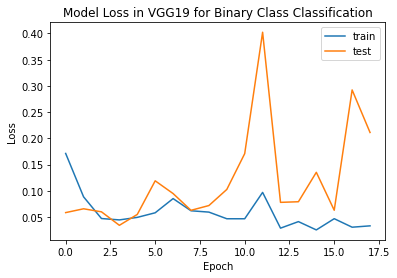

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Loss in VGG19 for Binary Class Classification')
pyplot.ylabel('Loss')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/LossNASNetMobile.png')
pyplot.legend()
pyplot.show()

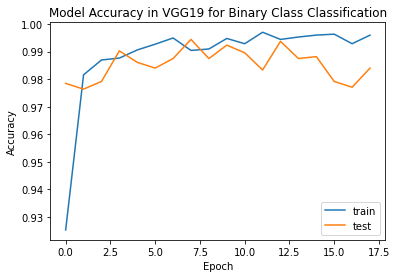

In [ ]:
import matplotlib.pyplot as pyplot
pyplot.title('Model Accuracy in VGG19 for Binary Class Classification')
pyplot.ylabel('Accuracy')
pyplot.xlabel('Epoch')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.savefig('/content/drive/My Drive/DR_Messidor_Dataset/AccuracyNASNetMobile.png')
pyplot.legend()
pyplot.show()